### Jeg tenker at vi kan skrive innleveringen i denne filen, men mer eksperimentell python koding kan gjøres i sine egne filer før det flyttes hit.

p = 1
max bølgehastighet = 13.89
CFL = 0.13889999999999875

p = 2
max bølgehastighet = 27.78
CFL = 0.2777999999999975

p = 5
max bølgehastighet = 69.45
CFL = 0.6944999999999938



Animation size has reached 21029336 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


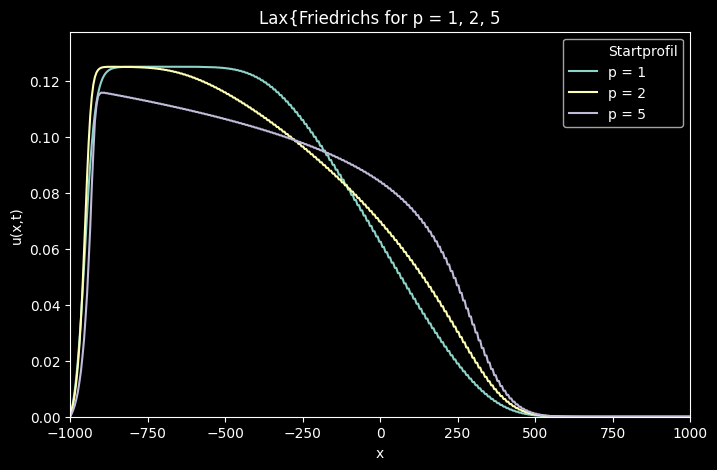

In [1]:

# Oppgave 2c)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# ------------------------------------------------------------
# Parametre
# ------------------------------------------------------------
v_max = 13.89
u_max = 1/8
T = 20
nt = 400
a, b = -1000, 1000
nx = 400
t_grid = np.linspace(0.0, T, nt)
x_grid = np.linspace(a, b, nx)
dt = t_grid[1] - t_grid[0]
dx = x_grid[1] - x_grid[0]
# ------------------------------------------------------------
# Fluks
# ------------------------------------------------------------
def flux_traffik(u, p):
    return u * (v_max * (1 - (u/u_max)**p))
# ------------------------------------------------------------
# Lax{Friedrichs
# ------------------------------------------------------------
def lax_friedrichs(u0, p):
    u = np.zeros((nt, nx))
    u[0, :] = u0
    for n in range(1, nt):
        u_prev = u[n-1, :]
        u_next = np.zeros_like(u_prev)
        u_next[1:-1] = 0.5*(u_prev[:-2] + u_prev[2:]) \
        - (dt/(2*dx)) * (
        flux_traffik(u_prev[2:], p) -
        flux_traffik(u_prev[:-2], p)
        )
        u_next[0] = 0.0
        u_next[-1] = 0.0
        u[n, :] = u_next
    return u
# ------------------------------------------------------------
# Initialbetingelse
# ------------------------------------------------------------
u0 = np.where(x_grid <= 0,u_max, 0.0)
# ------------------------------------------------------------
# Kjør simulering
# ------------------------------------------------------------
p_values = [1, 2, 5]
solutions = {}
for p in p_values:
    solutions[p] = lax_friedrichs(u0, p)
# CFL-sjekk (pedagogisk)
def flux_derivative(u, p):
    return v_max*(1 - (u/u_max)**p) \
    - v_max*u*(p/u_max)*(u/u_max)**(p-1)
for p in p_values:
    max_speed = np.max(np.abs(flux_derivative(u0, p)))
    cfl = dt/dx * max_speed
    print(f"p = {p}")
    print("max bølgehastighet =", max_speed)
    print("CFL =", cfl)
    print()

# ------------------------------------------------------------
# Animasjon
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,5))
ax.set_xlim(x_grid[0], x_grid[-1])
ax.set_ylim(0, np.max(u0)*1.1)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Lax{Friedrichs for p = 1, 2, 5")
# Startprofil
ax.plot(x_grid, u0, "k--", label="Startprofil")
# Linjer som skal oppdateres
line1, = ax.plot(x_grid, solutions[1][0,:], label="p = 1")
line2, = ax.plot(x_grid, solutions[2][0,:], label="p = 2")
line3, = ax.plot(x_grid, solutions[5][0,:], label="p = 5")
ax.legend()
def animate(i):
    line1.set_ydata(solutions[1][i,:])
    line2.set_ydata(solutions[2][i,:])
    line3.set_ydata(solutions[5][i,:])
    return line1, line2, line3

ani = animation.FuncAnimation(
    fig,
    animate,
    frames=nt,
    interval=30,
    blit=True
)
HTML(ani.to_jshtml())
plt.show()
